## Лабораторная работа №0
### Задание
#### Задать значения количества продаж по 10 товарам в течении 12 месяцев (помесячно).
#### Для каждого из товаров спрогнозировать количество продаж на следующий, 13 месяц и провести анализ достоверности планирования продаж.

In [1]:
# Модуль random используется для генерации случайных чисел и других случайных операций.
import random

# Модуль numpy (сокращение от "Numerical Python") предоставляет функциональность для эффективной работы
# с массивами и математическими операциями на ними.
import numpy as np

# Модуль pandas предназначен для работы с данными в виде таблиц и датафреймов. Он обеспечивает
# удобные средства для анализа и манипуляции данными.
import pandas as pd

# Модуль matplotlib.pyplot используется для создания графиков и визуализации данных.
# Он предоставляет множество функций для построения различных типов графиков.
import matplotlib.pyplot as plt

# Модуль warnings используется для управления предупреждениями во время выполнения программы.
# В данном фрагменте кода устанавливается игнорирование предупреждений типа FutureWarning,
# что может быть полезным, чтобы скрыть определенные сообщения о будущих изменениях в библиотеках.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
class Product:
    """
    Класс Product представляет товар с указанным именем и количеством (по умолчанию None).

    Атрибуты:
    - name (str): Имя товара.
    - count (list или float): Количество товара в виде списка значений (если указано) или случайно 
      сгенерированное количество в течение 12 месяцев (если count равно None).

    Методы:
    - __init__(self, name, count=None): Конструктор класса. Создает экземпляр товара с заданным именем и количеством.
      Если count не указан, генерирует случайное количество.
    """
    def __init__(self, name, count=None):
        self.name = name
        if count is not None:
            self.count = count
        else:
            min_rand = random.randint(100, 150)
            delt_rand = 20
            self.count = np.random.normal(min_rand, delt_rand, 12)

    def __str__(self):
        """
        Возвращает строковое представление товара, включая его имя и количество за 12 месяцев.
        """
        return f'{self.name}: {[i for i in self.count]}'

    def __repr__(self):
        """
        Возвращает строковое представление товара, включая его имя и количество за 12 месяцев.
        """
        return f'{self.name}: {[i for i in self.count]}'

    def to_dict(self):
        """
        Преобразует товар в словарь, где ключ - имя товара, а значение - список количества за 12 месяцев.
        """
        return {
            self.name: self.count
        }

    def sum(self):
        """
        Возвращает общую стоимость товара за 12 месяцев.
        """
        return sum(self.count)

    def avg(self):
        """
        Возвращает среднюю цену товара за 12 месяцев.
        """
        return round(sum(self.count) / len(self.count), 4)

    def msd(self):
        """
        Возвращает среднеквадратичное отклонение (СКО) количества товара за 12 месяцев.
        """
        avg_value = self.avg()
        upper_value = sum([(v - avg_value) ** 2 for v in self.count])
        msd_square = upper_value / (len(self.count) - 1)
        return msd_square ** 0.5

In [3]:
# Создаем список продуктов.
products = [
    Product(name='Процессор'),          
    Product(name='Материнская плата'),   
    Product(name='Оперативная память'), 
    Product(name='Видеокарта'),        
    Product(name='Блок питания'),       
    Product(name='Корпус'),            
    Product(name='SSD'),                
    Product(name='Монитор'),        
    Product(name='Клавиатура'),  
    Product(name='Мышь')                
]

# Возвращаем список продуктов.
products

[Процессор: [111.84929689472055, 89.44312455627288, 107.93194724456892, 129.2715390854802, 108.56632400520914, 80.78939978825765, 112.4499789222279, 83.14189946610811, 121.21396080805775, 131.7242783010526, 49.168861391334524, 81.05996535582062],
 Материнская плата: [105.69345281735256, 144.93236908781088, 128.260566866502, 183.54879545553896, 155.8947613629432, 141.7922346254634, 128.10704413333298, 111.07733279559737, 146.0299397327618, 103.52229960421039, 130.42671284477217, 128.55418192841566],
 Оперативная память: [103.50123682428432, 84.78729733197716, 91.58874651522348, 105.72520863755358, 126.23059215212271, 128.32593760435734, 120.95183446770739, 142.13566733102238, 91.44130716211502, 121.50623581740565, 112.57105562948243, 86.2561346052067],
 Видеокарта: [101.0465545333181, 59.14816369216243, 128.45796635623955, 140.02282982097228, 99.3766781583161, 109.94851719456145, 72.38829564124835, 105.96223375644186, 131.71744163855604, 112.89243871934964, 125.7456642809408, 109.699383

In [4]:
def convert_list_products_to_dict(p_list: list):
    """
    Конвертирует лист продуктов в словарь для визуализации в датафрейме.
    """
    result = {}
    for p in p_list:
        result[p.name] = p.count
    return result

In [5]:
df = pd.DataFrame(convert_list_products_to_dict(products))
df

,Процессор,Материнская плата,Оперативная память,Видеокарта,Блок питания,Корпус,SSD,Монитор,Клавиатура,Мышь
0,111.849297,105.693453,103.501237,101.046555,135.200992,104.796761,94.666480,146.687333,101.742947,115.681060
1,89.443125,144.932369,84.787297,59.148164,124.105569,131.939097,160.931816,194.180594,108.906349,88.969619
2,107.931947,128.260567,91.588747,128.457966,92.144473,135.266730,104.460611,120.380864,111.575484,95.067904
3,129.271539,183.548795,105.725209,140.022830,104.462722,168.433187,108.174366,116.540510,93.162165,93.919666
4,108.566324,155.894761,126.230592,99.376678,130.371055,132.451737,150.871222,130.210315,148.203504,128.026104
5,80.789400,141.792235,128.325938,109.948517,140.201305,115.740841,132.179864,123.553063,116.951608,105.633853
6,112.449979,128.107044,120.951834,72.388296,122.627548,162.695544,138.623517,116.721763,114.575126,70.644078
7,83.141899,111.077333,142.135667,105.962234,114.232918,115.573924,139.366870,181.960282,105.419878,80.814404
8,121.213961,146.029940,91.441307,131.717442,144.797806,128.347580,139.809257,139.877615,125.855036,81.585510
9,131.724278,103.522300,121.506236,112.892439,167.034978,104.442471,114.072128,106.063038,126.771744,116.623708


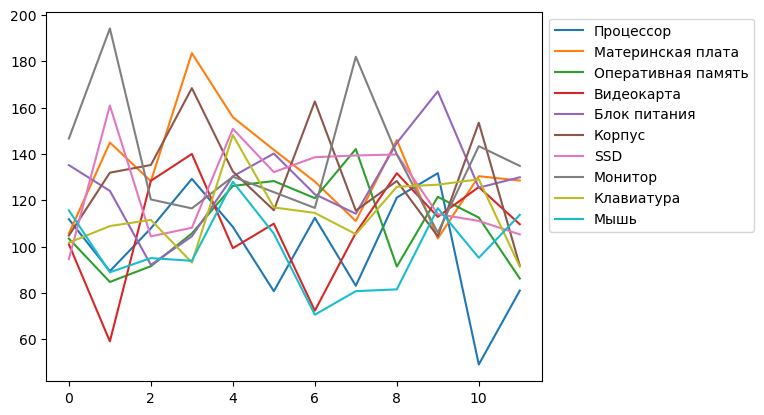

In [6]:
# Визуализируем количество продуктов на графике, отображая данные для каждого продукта.

for product in products:
    plt.plot([i for i in range(12)], product.count, label=product.name)

plt.legend(bbox_to_anchor=(1, 1))  # Создаем легенду для отображения названий продуктов.
plt.show()


In [7]:
# Вычисляем средние значения для каждого продукта из списка products и сохраняем их в список p0.
p0 = [product.avg() for product in products]

# Создаем список строк, в которых каждая строка содержит имя продукта и его среднее значение,
# используя списки p0 и products в соответствии с итерацией через zip().
[f'{p.name}: {p_avg}' for p_avg, p in zip(p0, products)]

['Процессор: 100.5509',
 'Материнская плата: 133.9866',
 'Оперативная память: 109.5851',
 'Видеокарта: 108.0338',
 'Блок питания: 127.5518',
 'Корпус: 128.7469',
 'SSD: 124.9646',
 'Монитор: 137.8705',
 'Клавиатура: 114.4705',
 'Мышь: 98.8273']

In [8]:
# Вычисляем значения СКО (среднеквадратичного отклонения) для каждого продукта в списке products.
msd_products = [product.msd() for product in products]

# Создаем список строк, в которых каждая строка содержит имя продукта и его MSD значение,
# используя списки msd_products и products в соответствии с итерацией через zip().
[f'{product.name}: {msd_value}' for msd_value, product in zip(msd_products, products)]

['Процессор: 24.21225972056379',
 'Материнская плата: 22.61357089060906',
 'Оперативная память: 18.665019914866093',
 'Видеокарта: 23.613521669537153',
 'Блок питания: 19.29017904307056',
 'Корпус: 23.89148067794575',
 'SSD: 21.210034237511913',
 'Монитор: 26.49121189909976',
 'Клавиатура: 16.25823043269406',
 'Мышь: 17.2870820430348']

In [9]:
# Генерируем предсказанные значения, добавляя к средним значениям p0 случайный шум
# с нормальным распределением. Это позволяет смоделировать случайную изменчивость данных.
predict_values = p0 + np.random.normal(0, msd_products, len(msd_products))

predict_values

array([138.06082543,  73.78522126,  99.98134337, 105.31432916,
       138.4987355 , 138.95058858,  72.22594325, 147.00691707,
       104.69392244,  86.57137055])

In [10]:
# Обновляем значения 'count' для продуктов в соответствии с предсказанными значениями 'predict_values'.
for product, predict_value in zip(products, predict_values):
    product.count = np.append(product.count, predict_value)
products

[Процессор: [111.84929689472055, 89.44312455627288, 107.93194724456892, 129.2715390854802, 108.56632400520914, 80.78939978825765, 112.4499789222279, 83.14189946610811, 121.21396080805775, 131.7242783010526, 49.168861391334524, 81.05996535582062, 138.06082543154292],
 Материнская плата: [105.69345281735256, 144.93236908781088, 128.260566866502, 183.54879545553896, 155.8947613629432, 141.7922346254634, 128.10704413333298, 111.07733279559737, 146.0299397327618, 103.52229960421039, 130.42671284477217, 128.55418192841566, 73.78522125536406],
 Оперативная память: [103.50123682428432, 84.78729733197716, 91.58874651522348, 105.72520863755358, 126.23059215212271, 128.32593760435734, 120.95183446770739, 142.13566733102238, 91.44130716211502, 121.50623581740565, 112.57105562948243, 86.2561346052067, 99.98134337414493],
 Видеокарта: [101.0465545333181, 59.14816369216243, 128.45796635623955, 140.02282982097228, 99.3766781583161, 109.94851719456145, 72.38829564124835, 105.96223375644186, 131.7174416

In [11]:
# Создаем DataFrame (таблицу) на основе словаря, полученного из списка продуктов 'products'
# с помощью функции 'convert_list_products_to_dict'.
df = pd.DataFrame(convert_list_products_to_dict(products))
df

,Процессор,Материнская плата,Оперативная память,Видеокарта,Блок питания,Корпус,SSD,Монитор,Клавиатура,Мышь
0,111.849297,105.693453,103.501237,101.046555,135.200992,104.796761,94.666480,146.687333,101.742947,115.681060
1,89.443125,144.932369,84.787297,59.148164,124.105569,131.939097,160.931816,194.180594,108.906349,88.969619
2,107.931947,128.260567,91.588747,128.457966,92.144473,135.266730,104.460611,120.380864,111.575484,95.067904
3,129.271539,183.548795,105.725209,140.022830,104.462722,168.433187,108.174366,116.540510,93.162165,93.919666
4,108.566324,155.894761,126.230592,99.376678,130.371055,132.451737,150.871222,130.210315,148.203504,128.026104
5,80.789400,141.792235,128.325938,109.948517,140.201305,115.740841,132.179864,123.553063,116.951608,105.633853
6,112.449979,128.107044,120.951834,72.388296,122.627548,162.695544,138.623517,116.721763,114.575126,70.644078
7,83.141899,111.077333,142.135667,105.962234,114.232918,115.573924,139.366870,181.960282,105.419878,80.814404
8,121.213961,146.029940,91.441307,131.717442,144.797806,128.347580,139.809257,139.877615,125.855036,81.585510
9,131.724278,103.522300,121.506236,112.892439,167.034978,104.442471,114.072128,106.063038,126.771744,116.623708


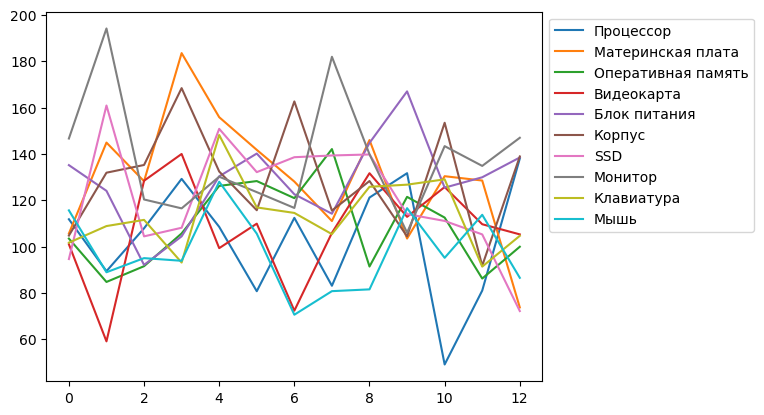

In [12]:
for product in products:
    plt.plot([i for i in range(13)], product.count, label=product.name)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [13]:
# Вычисляем уровень достоверности для каждого продукта, используя отношение СКО к среднему значению.
reliability = [msd_value / p0_value for msd_value, p0_value in zip(msd_products, p0)]

# Создаем список строк, в которых каждая строка содержит имя продукта и его уровень достоверности.
[f'{product.name}: {reliability_value}' for product, reliability_value in zip(products, reliability)]

['Процессор: 0.24079605175651128',
 'Материнская плата: 0.16877486920788393',
 'Оперативная память: 0.17032443201553946',
 'Видеокарта: 0.2185753131847362',
 'Блок питания: 0.15123407935498018',
 'Корпус: 0.18556936654743336',
 'SSD: 0.16972834096625694',
 'Монитор: 0.19214561417489429',
 'Клавиатура: 0.1420298717372079',
 'Мышь: 0.17492213227554332']

#### Первое условие
##### Величины $ {X_i} $ лежат близко к своему среднему значению. Это условие означает, что продажи стабильные
##### $ X_i - \hat{p_0} < 2\hat{\sigma} $ для всех $ i $

In [14]:
# Преобразуем списки p0 и msd_products в массивы NumPy для выполнения операций с массивами.
p0_np = np.array(p0)
msd_np = np.array(msd_products)

# Создаем DataFrame 'products_df' на основе словаря, полученного из списка продуктов 'products'.
products_df = pd.DataFrame(convert_list_products_to_dict(products))

# Вычисляем 'condition_one', сравнивая каждое значение в 'products_df' с условием.
# Условие считается истинным, если разница между значением 'products_df' и 'p0_np' меньше 2-х раз 'msd_np'.
condition_one = products_df - p0_np < (2 * msd_np)
condition_one

,Процессор,Материнская плата,Оперативная память,Видеокарта,Блок питания,Корпус,SSD,Монитор,Клавиатура,Мышь
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,False,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,False,True,True,True,True,True


In [15]:
condition_one.all()

Процессор              True
Материнская плата     False
Оперативная память     True
Видеокарта             True
Блок питания          False
Корпус                 True
SSD                    True
Монитор               False
Клавиатура            False
Мышь                   True
dtype: bool

##### Второе условие
###### Экстраполируемые значения $ X_i $ с большей степенью достоверности не равны 0. Это условие означает, что период для прогноза не слишком велик
###### $ \hat{p_0} > 2\hat{\sigma} $

In [16]:
# Создаем новое условие 'condition_two', сравнивая каждое значение в 'p0_np' с условием.
# Условие считается истинным, если значение в 'p0_np' больше чем два раза 'msd_np'.
condition_two = p0_np > (2 * msd_np)
condition_two

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [17]:
[f'{product.name}: {condition_value}' for product, condition_value in zip(products, condition_two)]

['Процессор: True',
 'Материнская плата: True',
 'Оперативная память: True',
 'Видеокарта: True',
 'Блок питания: True',
 'Корпус: True',
 'SSD: True',
 'Монитор: True',
 'Клавиатура: True',
 'Мышь: True']

##### Третье условие
###### Среди $ X_i $ не встречаются нулевые значения. Это условие означает, что периодичность анализа данных выбрана правильно
###### $ X_i > 0 $ для всех $ i $

In [18]:
# Создаем список строк, в которых каждая строка содержит имя продукта и результат 'condition_three'.
condition_three = products_df > 0
condition_three

,Процессор,Материнская плата,Оперативная память,Видеокарта,Блок питания,Корпус,SSD,Монитор,Клавиатура,Мышь
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True


In [19]:
condition_three.all()

Процессор             True
Материнская плата     True
Оперативная память    True
Видеокарта            True
Блок питания          True
Корпус                True
SSD                   True
Монитор               True
Клавиатура            True
Мышь                  True
dtype: bool

### Составим таблицу для визуализации достоверности планирования

In [20]:
def get_color_by_condition(c1, c2, c3):
    """
    Функция определяет уровень достоверности на основе трех условий.

    Аргументы:
    - c1 (bool): Первое условие.
    - c2 (bool): Второе условие.
    - c3 (bool): Третье условие.

    Возвращает:
    - str: Уровень достоверности, который может быть "Зеленый", "Желтый", "Оранжевый" или "Красный".
    """
    if c1 and c2 and c3:
        return "Зеленый"
    elif (not c1 and c2 and c3) or (c1 and not c2 and c3):
        return "Желтый"
    elif not c1 and not c2 and c3:
        return "Оранжевый"
    else:
        return "Красный"

In [21]:
# Создаем заголовок таблицы 'table_header' с названиями столбцов.
table_header = ["Товар", "Уровень достоверности", "Условие 1", "Условие 2", "Условие 3"]

# Создаем пустой список 'table_data' для хранения данных, которые будут добавлены в таблицу.
table_data = []

# Вычисляем результаты условий 'condition_one', 'condition_two' и 'condition_three'.
condition_one_result = condition_one.all()
condition_two_result = condition_two
condition_three_result = condition_three.all()

# В цикле добавляем данные о продуктах и их уровне достоверности в список 'table_data'.
for i in range(len(products)):
    table_data.append({
        "Товар": products[i].name,
        "Уровень достоверности": get_color_by_condition(condition_one_result[i], condition_two_result[i], condition_three_result[i]),
        "Условие 1": condition_one_result[i],
        "Условие 2": condition_two_result[i],
        "Условие 3": condition_three_result[i]
    })

# Создаем DataFrame 'table' на основе данных из 'table_data' и с заданным заголовком 'table_header'.
table = pd.DataFrame(table_data, columns=table_header)

# Выводим полученную таблицу 'table'.
table

,Товар,Уровень достоверности,Условие 1,Условие 2,Условие 3
0,Процессор,Зеленый,True,True,True
1,Материнская плата,Желтый,False,True,True
2,Оперативная память,Зеленый,True,True,True
3,Видеокарта,Зеленый,True,True,True
4,Блок питания,Желтый,False,True,True
5,Корпус,Зеленый,True,True,True
6,SSD,Зеленый,True,True,True
7,Монитор,Желтый,False,True,True
8,Клавиатура,Желтый,False,True,True
9,Мышь,Зеленый,True,True,True


In [22]:
def color_rows_by_reliability(val):
    if val == "Зеленый":
        return 'background-color: green'
    elif val == "Желтый":
        return 'background-color: yellow'
    elif val == "Оранжевый":
        return 'background-color: orange'
    elif val == "Красный":
        return 'background-color: red'
    else:
        return ''

In [23]:
table_style = table["Уровень достоверности"].to_frame().applymap(lambda x: color_rows_by_reliability(x))
styled_table = table.style.apply(lambda x: table_style, axis=None)
styled_table

,Товар,Уровень достоверности,Условие 1,Условие 2,Условие 3
0,Процессор,Зеленый,True,True,True
1,Материнская плата,Желтый,False,True,True
2,Оперативная память,Зеленый,True,True,True
3,Видеокарта,Зеленый,True,True,True
4,Блок питания,Желтый,False,True,True
5,Корпус,Зеленый,True,True,True
6,SSD,Зеленый,True,True,True
7,Монитор,Желтый,False,True,True
8,Клавиатура,Желтый,False,True,True
9,Мышь,Зеленый,True,True,True
